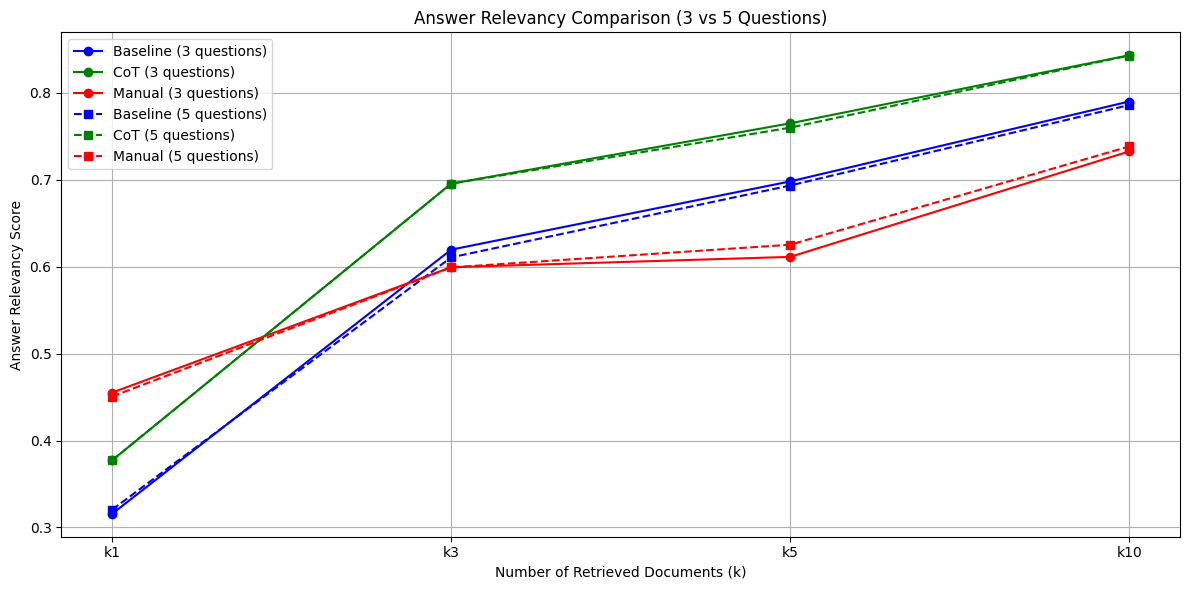

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the data
with open('contractnli_evaluation_results_reorganized_by_type.json', 'r') as f:
    data_3q = json.load(f)

with open('evaluation_ans_relevancy_5_results_reorganized_by_type.json', 'r') as f:
    data_5q = json.load(f)

# Extract k values and metrics
k_values = ['k1', 'k3', 'k5', 'k10']
x = np.arange(len(k_values))
width = 0.35

# Prepare data for plotting
baseline_3q = [float(data_3q['baseline'][k]['ragas_metrics'].split("'answer_relevancy': ")[1].split('}')[0]) for k in k_values]
cot_3q = [float(data_3q['CoT'][k]['ragas_metrics'].split("'answer_relevancy': ")[1].split('}')[0]) for k in k_values]
manual_3q = [float(data_3q['manually_written'][k]['ragas_metrics'].split("'answer_relevancy': ")[1].split('}')[0]) for k in k_values]

baseline_5q = [float(data_5q['baseline'][k]['ragas_metrics'].split("'answer_relevancy': ")[1].split('}')[0]) for k in k_values]
cot_5q = [float(data_5q['CoT'][k]['ragas_metrics'].split("'answer_relevancy': ")[1].split('}')[0]) for k in k_values]
manual_5q = [float(data_5q['manually_written'][k]['ragas_metrics'].split("'answer_relevancy': ")[1].split('}')[0]) for k in k_values]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot 3 question data
plt.plot(k_values, baseline_3q, 'o-', label='Baseline (3 questions)', color='blue')
plt.plot(k_values, cot_3q, 'o-', label='CoT (3 questions)', color='green')
plt.plot(k_values, manual_3q, 'o-', label='Manual (3 questions)', color='red')

# Plot 5 question data
plt.plot(k_values, baseline_5q, 's--', label='Baseline (5 questions)', color='blue')
plt.plot(k_values, cot_5q, 's--', label='CoT (5 questions)', color='green')
plt.plot(k_values, manual_5q, 's--', label='Manual (5 questions)', color='red')

plt.xlabel('Number of Retrieved Documents (k)')
plt.ylabel('Answer Relevancy Score')
plt.title('Answer Relevancy Comparison (3 vs 5 Questions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
